In [35]:
import pandas as pd

df = pd.read_csv('occurrences.csv', low_memory=False)

In [36]:
df.shape

(58157, 93)

In [37]:
df.columns

Index(['id', 'institutionCode', 'collectionCode', 'ownerInstitutionCode',
       'collectionID', 'basisOfRecord', 'occurrenceID', 'catalogNumber',
       'otherCatalogNumbers', 'higherClassification', 'kingdom', 'phylum',
       'class', 'order', 'family', 'scientificName', 'taxonID',
       'scientificNameAuthorship', 'genus', 'subgenus', 'specificEpithet',
       'verbatimTaxonRank', 'infraspecificEpithet', 'taxonRank',
       'identifiedBy', 'dateIdentified', 'identificationReferences',
       'identificationRemarks', 'taxonRemarks', 'identificationQualifier',
       'typeStatus', 'recordedBy', 'recordNumber', 'eventDate', 'year',
       'month', 'day', 'startDayOfYear', 'endDayOfYear', 'verbatimEventDate',
       'occurrenceRemarks', 'habitat', 'fieldNumber', 'eventID',
       'informationWithheld', 'dataGeneralizations', 'dynamicProperties',
       'associatedOccurrences', 'associatedSequences', 'associatedTaxa',
       'reproductiveCondition', 'establishmentMeans', 'lifeStage', '

In [38]:
no_duplicata_otherHerb_df = df[df['associatedOccurrences'].isna()]

In [39]:
no_duplicata_otherHerb_df.shape

(32467, 93)

In [40]:
only_texas_plantsdf = no_duplicata_otherHerb_df[no_duplicata_otherHerb_df['stateProvince'].str.lower() == "texas"]
only_texas_plantsdf.shape

(23141, 93)

In [32]:
# Convert 'year' column to datetime with errors='coerce' and filtering out invalid years
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')
no_duplicata_otherHerb_df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')

/tmp/ipykernel_2061/4055900664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_duplicata_otherHerb_df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce')


In [33]:
import folium
from folium.plugins import HeatMap
from IPython.display import display
import numpy as np

# Drop rows with NaN values in 'decimalLatitude' or 'decimalLongitude'
df_clean = df.dropna(subset=['decimalLatitude', 'decimalLongitude'])

# Calculate map center
map_center = [df_clean['decimalLatitude'].mean(), df_clean['decimalLongitude'].mean()]

# Create map
m = folium.Map(location=map_center, zoom_start=5)

# Prepare data for heatmap
heat_data = df_clean[['decimalLatitude', 'decimalLongitude']].values.tolist()

# Add heatmap layer
heatmap  = HeatMap(heat_data, radius=5, blur=5).add_to(m)


# Display map in notebook
display(m)



#save
m.save("heatmap.html")

In [5]:
import folium
from IPython.display import display

# Drop rows with NaN values in 'decimalLatitude' or 'decimalLongitude'
df_clean = df.dropna(subset=['decimalLatitude', 'decimalLongitude'])

# Drop duplicate rows based on 'decimalLatitude' and 'decimalLongitude'
df_clean = df_clean.drop_duplicates(subset=['decimalLatitude', 'decimalLongitude'])

# Calculate map center
map_center = [df_clean['decimalLatitude'].mean(), df_clean['decimalLongitude'].mean()]

# Create map centered around the mean latitude and longitude
m = folium.Map(location=map_center, zoom_start=5)

# Add red circle markers for each unique location in df_clean
for index, row in df_clean.iterrows():
    folium.CircleMarker(location=[row['decimalLatitude'], row['decimalLongitude']],
                        radius=2,
                        color='red',
                        fill=True,
                        fill_color='red',
                        fill_opacity=1.0).add_to(m)

# Display map in notebook
display(m)

# Save the m as HTML file
m.save("red_circle_markers_map.html")


In [6]:
# Total number of observations in your cleaned dataframe
total_observations = len(df)

# Number of observations used in the heatmap
observations_in_heatmap = len(heat_data)

# Number of observations not used in the heatmap
observations_not_in_heatmap = total_observations - observations_in_heatmap

print(f"Total Observations: {total_observations}")
print(f"Observations in Heatmap: {observations_in_heatmap}")
print(f"Observations Not in Heatmap: {observations_not_in_heatmap}")


Total Observations: 58157
Observations in Heatmap: 15613
Observations Not in Heatmap: 42544


In [41]:
import folium
from folium.plugins import HeatMap
from IPython.display import display

# Drop rows with NaN values in 'decimalLatitude' or 'decimalLongitude'
df_clean = df.dropna(subset=['decimalLatitude', 'decimalLongitude'])

# Filter data based on a range of years
start_year = 2010
end_year = 2024
df_filtered = df_clean[df_clean['year'].between(start_year, end_year)]

# Calculate map center
map_center = [df_filtered['decimalLatitude'].mean(), df_filtered['decimalLongitude'].mean()]

# Create map
m = folium.Map(location=map_center, zoom_start=5)

# Prepare data for heatmap or markers
heat_data = df_filtered[['decimalLatitude', 'decimalLongitude']].values.tolist()

# Add heatmap layer or markers based on your preference
# Example: Heatmap
heatmap = HeatMap(heat_data, radius=5, blur=5).add_to(m)


# Display map in notebook
display(m)

# Save the map as HTML file
m.save("filtered_map.html")
print(f"Collected specimens {start_year}-{end_year} = {len(df_filtered)}")


Collected specimens 2010-2024 = 282


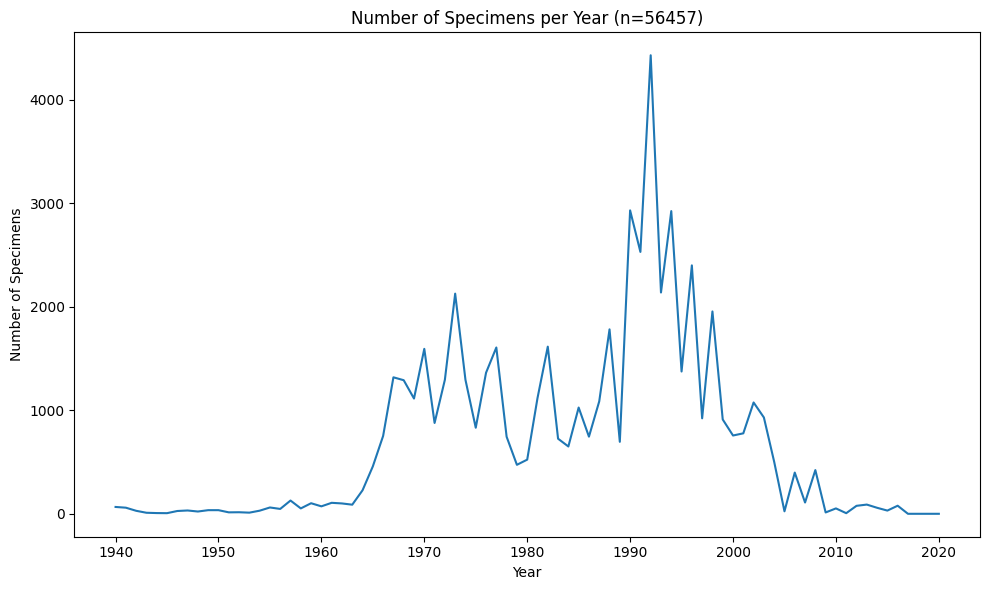

In [31]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter out rows with NaT values or years beyond the valid range
min_year = 1940
max_year = 2024  
df_filt = df[(df['year'].dt.year >= min_year) & (df['year'].dt.year <= max_year)]

# Group by year and count the number of rows
year_counts = df_filt.groupby(df_filt['year'].dt.year).size()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values, marker='', linestyle='-')
plt.title(f'Number of Specimens per Year (n={len(df_filt)})')
plt.xlabel('Year')
plt.ylabel('Number of Specimens')

# Set x-axis ticks at fixed intervals per decade
start_year = min(year_counts.index)
end_year = max(year_counts.index)
plt.xticks(range(start_year, end_year + 1, 10))

plt.tight_layout()
plt.show()


In [305]:
import pandas as pd

# Group by 'recordedBy' and aggregate 'recordNumber' and 'year'
def aggregate_data(group):
    record_numbers = list(group['recordNumber'])
    min_year = group['year'].min()
    max_year = group['year'].max()
    return [record_numbers, [min_year, max_year]]

# recorded_by_dict = df.groupby('recordedBy').apply(aggregate_data).to_dict() #all specimens
# recorded_by_dict = no_duplicata_otherHerb_df.groupby('recordedBy').apply(aggregate_data).to_dict() #test to remove potential duplicatas
recorded_by_dict = only_texas_plantsdf.groupby('recordedBy').apply(aggregate_data).to_dict() #only those in texas noduplicata

# Display the dictionary
len(recorded_by_dict), "collectors"

(1135, 'collectors')

In [306]:
# chicking again the unique collectors

unique_strings = only_texas_plantsdf['recordedBy'].unique()

# To print the unique strings
len(unique_strings)


1136

In [307]:
filtered_names = []

def is_numeric(num):
    try:
        return float(num)  # Try converting to float
    except ValueError:
        return None  # Return None if conversion fails

for name, values in recorded_by_dict.items():
    record_numbers = values[0]
    min_year, max_year = values[1]
    is_valid = False
    
    # Check if name contains "class" (case insensitive)
    if 'class' in name.lower():
        is_valid = True
    else:
        # Check record numbers
        valid_record = False
        for num in record_numbers:
            num_value = is_numeric(num)
            if num_value is not None and num_value <= 100:
                valid_record = True
                break
        
        # Check year difference
        year_diff = (max_year - min_year).days / 365
        if year_diff <= 4:  # Check if the difference is at most 1 year
            valid_year = True
        else:
            valid_year = False
        
        # Final validation
        if valid_record and valid_year:
            is_valid = True
    
    if is_valid:
        filtered_names.append(name)

# Display the filtered names and count
filtered_names_count = len(filtered_names)
print(filtered_names_count, "potential students collectors")


705 potential students collectors


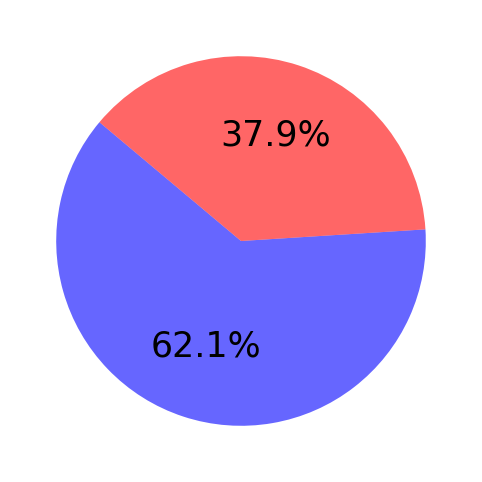

In [308]:

plt.figure(figsize=(8, 6))
plt.pie([filtered_names_count, len(recorded_by_dict)-filtered_names_count], 
    # labels=["Potential students collectors", "Other Collectors"], 
        autopct='%1.1f%%', startangle=140, colors=["blue", "red"],
        wedgeprops={'alpha': 0.6},
        textprops={'fontsize': 25}
       )

# Show plot
plt.show()

In [309]:
filtered_names

['407 Class',
 'A. A. Spence',
 'A. R. Boyd',
 'A. Timmerman',
 'Adela Paez',
 'Alan Rudd',
 'Alfred Jones',
 'Alfred Siebenaler',
 'Alice Scott',
 'Alton Everett',
 'Alvin Weathermon',
 'Alyson K. Glaze',
 'Alyson Kay Glaze',
 'Amanda Harrell',
 'Amanda Runnells',
 'Amy Demere',
 'Andy Klueh',
 'Andy Sandbothe',
 'Angel Garcia',
 'Angela Mackey',
 'Angelo State University Plant Taxonomy Class',
 'Ann Boyd',
 'Ann E. Boysen',
 'Ann Nobel',
 'Ann Noble',
 'Ann P. Leverich',
 'Ann Strahl',
 'Annette Olson',
 'Ashleigh Oeth',
 'Ashley Wilson',
 'Ashton McDowell',
 'B. A. Robinson',
 'B. Boren',
 'B. C. Henry',
 'B. Dillard',
 'B. Freeman',
 'B. G. Cumbie',
 'B. G. Menchaca',
 'B. Gipson',
 'B. Herndon',
 'B. L. Pilcher',
 'B. Ray Thomas',
 'Barbara Humphrey',
 'Barrett Koennecke',
 'Barry Cowart',
 'Bassam Salameh',
 'Beck Gipson',
 'Becky Bolen',
 'Becky Bplen',
 'Belinda Trevino',
 'Ben Pilcher',
 'Ben Q. Adams Jr.',
 'Bernita C. Blackwell',
 'Berry Jordan',
 'Beth A. Robinson',
 'Beth 

In [310]:
recorded_by_dict["Bill Wilson"]

[['79', '53', '50'],
 [Timestamp('1978-01-01 00:00:00'), Timestamp('1978-01-01 00:00:00')]]

In [311]:
from collections import defaultdict
import pandas as pd

# Initialize a dictionary to accumulate counts by year
accumulated_potential_students = defaultdict(int)

# Accumulate counts by year
for name in filtered_names:
    record_numbers, years = recorded_by_dict[name]
    
    try:
        start_year = pd.to_datetime(years[0]).year if pd.notna(years[0]) else None
        end_year = pd.to_datetime(years[1]).year if pd.notna(years[1]) else None
        
        if start_year is None or end_year is None:
            continue  # Skip this name if years are NaN or not usable
        
        # Check if start_year and end_year are reasonable (e.g., within a plausible range)
        if start_year < 1940 or end_year > 2024:
            continue  # Skip this name if years are not plausible
        
        for year in range(start_year, end_year + 1):
            accumulated_potential_students[year] += 1  # Add one count for each name per year
    
    except (TypeError, ValueError):
        continue  # Skip this name if there's an error in year extraction

# Convert defaultdict to regular dictionary and sort by year
accumulated_potential_students = dict(sorted(accumulated_potential_students.items()))

# Display the accumulated counts by year
print(accumulated_potential_students)


{1949: 1, 1951: 1, 1958: 1, 1959: 7, 1960: 5, 1961: 8, 1962: 10, 1963: 11, 1964: 8, 1965: 11, 1966: 26, 1967: 23, 1968: 18, 1969: 3, 1970: 11, 1971: 15, 1972: 23, 1973: 12, 1974: 19, 1975: 32, 1976: 11, 1977: 89, 1978: 11, 1979: 4, 1980: 8, 1981: 23, 1982: 27, 1983: 12, 1984: 10, 1985: 17, 1986: 15, 1987: 36, 1988: 9, 1989: 12, 1990: 26, 1991: 4, 1992: 30, 1993: 22, 1994: 26, 1995: 7, 1996: 27, 1997: 7, 1998: 24, 1999: 5, 2000: 9, 2001: 1, 2002: 9, 2003: 4, 2004: 14, 2005: 2, 2006: 12, 2007: 12, 2008: 17, 2009: 1, 2010: 11, 2011: 1, 2012: 16, 2013: 2, 2014: 1, 2015: 1, 2016: 1, 2017: 1}


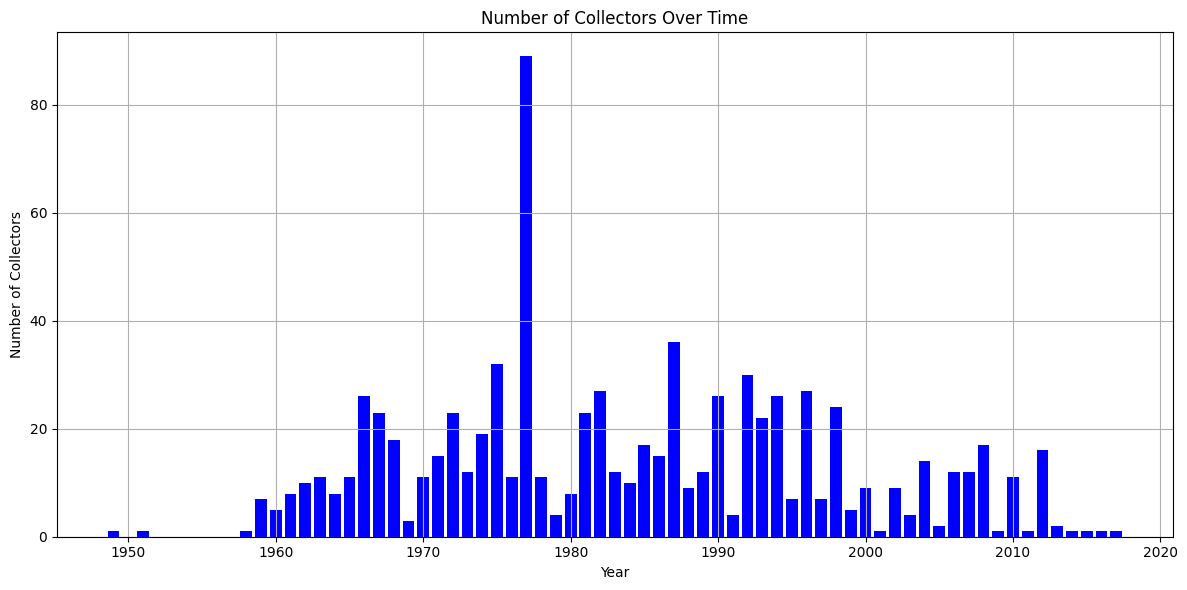

In [312]:
# Convert accumulated counts dictionary to lists for plotting
years = list(accumulated_potential_students.keys())
counts = list(accumulated_potential_students.values())

# Plotting with bar chart
plt.figure(figsize=(12, 6))
plt.bar(years, counts, color='b')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Collectors')
plt.title('Number of Collectors Over Time')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [313]:
from collections import defaultdict
import pandas as pd

# Initialize a dictionary to accumulate counts by year
accumulated_all_collectors = defaultdict(int)

# Accumulate counts by year
for name in recorded_by_dict.keys():
    record_numbers, years = recorded_by_dict[name]
    
    try:
        start_year = pd.to_datetime(years[0]).year if pd.notna(years[0]) else None
        end_year = pd.to_datetime(years[1]).year if pd.notna(years[1]) else None
        
        if start_year is None or end_year is None:
            continue  # Skip this name if years are NaN or not usable
        
        # Check if start_year and end_year are reasonable (e.g., within a plausible range)
        if start_year < 1940 or end_year > 2024:
            continue  # Skip this name if years are not plausible
        
        for year in range(start_year, end_year + 1):
            accumulated_all_collectors[year] += 1  # Add one count for each name per year
    
    except (TypeError, ValueError):
        continue  # Skip this name if there's an error in year extraction

# Convert defaultdict to regular dictionary and sort by year
accumulated_all_collectors = dict(sorted(accumulated_all_collectors.items()))

# Display the accumulated counts by year
print(accumulated_all_collectors)


{1940: 3, 1941: 2, 1942: 1, 1943: 1, 1944: 1, 1945: 1, 1946: 2, 1947: 6, 1948: 6, 1949: 5, 1950: 3, 1951: 3, 1952: 3, 1953: 1, 1954: 3, 1955: 7, 1956: 5, 1957: 7, 1958: 9, 1959: 15, 1960: 17, 1961: 19, 1962: 26, 1963: 25, 1964: 36, 1965: 25, 1966: 52, 1967: 63, 1968: 65, 1969: 35, 1970: 48, 1971: 43, 1972: 61, 1973: 50, 1974: 63, 1975: 76, 1976: 56, 1977: 130, 1978: 56, 1979: 48, 1980: 48, 1981: 66, 1982: 73, 1983: 55, 1984: 52, 1985: 62, 1986: 57, 1987: 80, 1988: 59, 1989: 62, 1990: 75, 1991: 54, 1992: 87, 1993: 80, 1994: 75, 1995: 53, 1996: 72, 1997: 44, 1998: 54, 1999: 19, 2000: 22, 2001: 15, 2002: 17, 2003: 19, 2004: 24, 2005: 7, 2006: 16, 2007: 17, 2008: 20, 2009: 3, 2010: 13, 2011: 3, 2012: 18, 2013: 6, 2014: 4, 2015: 5, 2016: 5, 2017: 2, 2018: 1, 2019: 1, 2020: 1}


In [314]:
from collections import defaultdict
import pandas as pd

# Initialize a dictionary to accumulate counts by year
accumulated_no_students = defaultdict(int)

# Accumulate counts by year
for name in recorded_by_dict.keys():
    if name in filtered_names:
        continue
    
    record_numbers, years = recorded_by_dict[name]
    
    try:
        start_year = pd.to_datetime(years[0]).year if pd.notna(years[0]) else None
        end_year = pd.to_datetime(years[1]).year if pd.notna(years[1]) else None
        
        if start_year is None or end_year is None:
            continue  # Skip this name if years are NaN or not usable
        
        # Check if start_year and end_year are reasonable (e.g., within a plausible range)
        if start_year < 1940 or end_year > 2024:
            continue  # Skip this name if years are not plausible
        
        for year in range(start_year, end_year + 1):
            accumulated_no_students[year] += 1  # Add one count for each name per year
    
    except (TypeError, ValueError):
        continue  # Skip this name if there's an error in year extraction

# Convert defaultdict to regular dictionary and sort by year
accumulated_no_students = dict(sorted(accumulated_no_students.items()))

# Display the accumulated counts by year
print(accumulated_no_students)


{1940: 3, 1941: 2, 1942: 1, 1943: 1, 1944: 1, 1945: 1, 1946: 2, 1947: 6, 1948: 6, 1949: 4, 1950: 3, 1951: 2, 1952: 3, 1953: 1, 1954: 3, 1955: 7, 1956: 5, 1957: 7, 1958: 8, 1959: 8, 1960: 12, 1961: 11, 1962: 16, 1963: 14, 1964: 28, 1965: 14, 1966: 26, 1967: 40, 1968: 47, 1969: 32, 1970: 37, 1971: 28, 1972: 38, 1973: 38, 1974: 44, 1975: 44, 1976: 45, 1977: 41, 1978: 45, 1979: 44, 1980: 40, 1981: 43, 1982: 46, 1983: 43, 1984: 42, 1985: 45, 1986: 42, 1987: 44, 1988: 50, 1989: 50, 1990: 49, 1991: 50, 1992: 57, 1993: 58, 1994: 49, 1995: 46, 1996: 45, 1997: 37, 1998: 30, 1999: 14, 2000: 13, 2001: 14, 2002: 8, 2003: 15, 2004: 10, 2005: 5, 2006: 4, 2007: 5, 2008: 3, 2009: 2, 2010: 2, 2011: 2, 2012: 2, 2013: 4, 2014: 3, 2015: 4, 2016: 4, 2017: 1, 2018: 1, 2019: 1, 2020: 1}


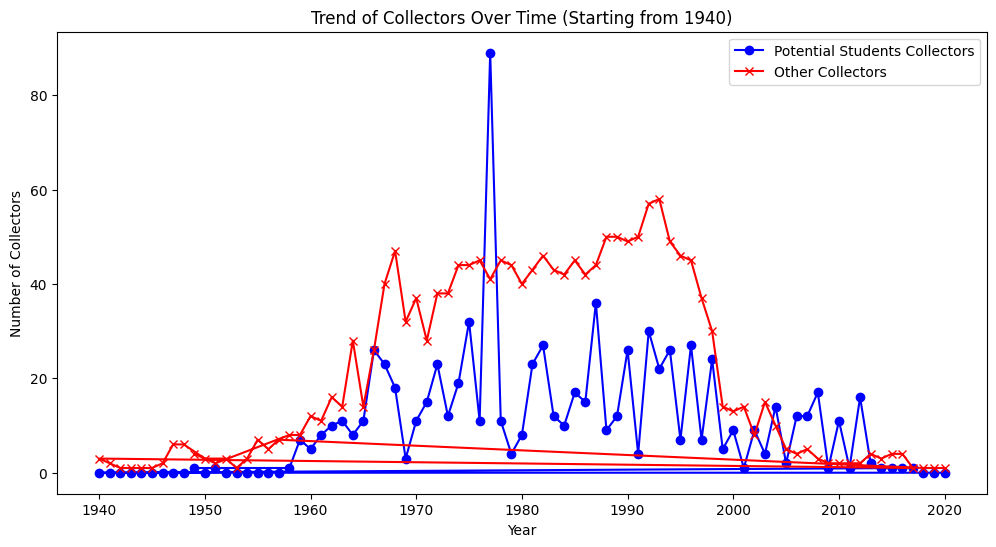

In [315]:
# Convert to pandas DataFrame
df_students = pd.DataFrame(list(accumulated_potential_students.items()), columns=['Year', 'Potential Students'])
df_collectors = pd.DataFrame(list(accumulated_no_students.items()), columns=['Year', 'Other Collectors'])

# Merge the DataFrames
df_stuvscoll = pd.merge(df_students, df_collectors, on='Year', how='outer').fillna(0)

# Filter data starting from 1940
df_stuvscoll = df_stuvscoll[df_stuvscoll['Year'] >= 1940]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df_stuvscoll['Year'], df_stuvscoll['Potential Students'], label='Potential Students Collectors', color='blue', marker='o')
plt.plot(df_stuvscoll['Year'], df_stuvscoll['Other Collectors'], label='Other Collectors', color='red', marker='x')

# Add titles and labels
plt.title('Trend of Collectors Over Time (Starting from 1940)')
plt.xlabel('Year')
plt.ylabel('Number of Collectors')
plt.legend()
plt.grid(False)

# Show plot
plt.show()

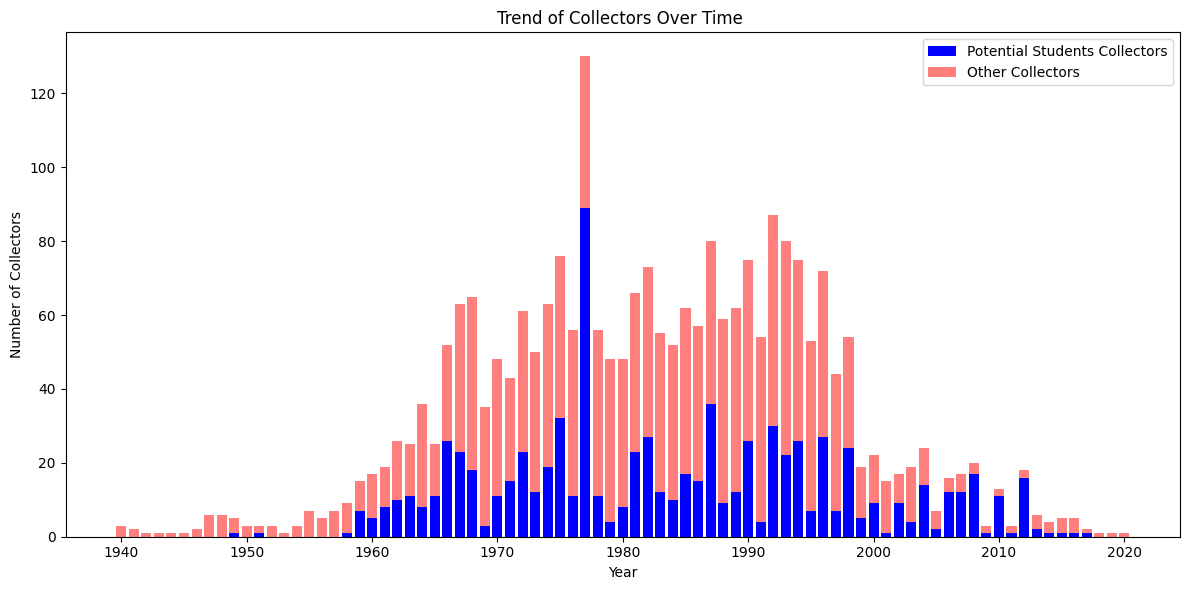

In [316]:
# Plotting with stacked bar chart
plt.figure(figsize=(12, 6))
plt.bar(df_stuvscoll['Year'], df_stuvscoll['Potential Students'], color='blue', label='Potential Students Collectors')
plt.bar(df_stuvscoll['Year'], df_stuvscoll['Other Collectors'], bottom=df_stuvscoll['Potential Students'], color='red', label='Other Collectors', alpha=0.5)

# Add titles and labels
plt.title('Trend of Collectors Over Time ')
plt.xlabel('Year')
plt.ylabel('Number of Collectors')
plt.legend()
plt.grid(False)

# Show plot
plt.tight_layout()
plt.show()


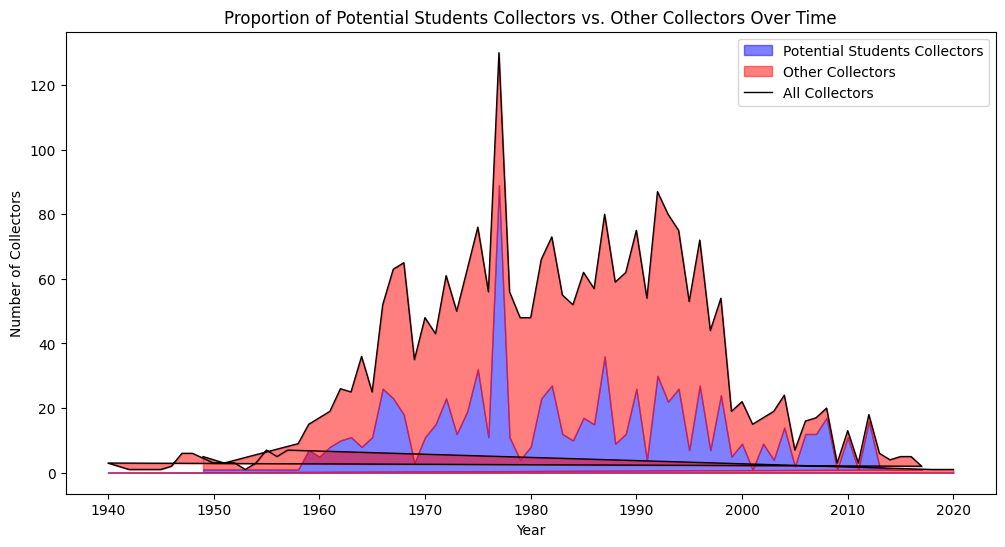

In [317]:
# Convert to pandas DataFrame
df_students = pd.DataFrame(list(accumulated_potential_students.items()), columns=['Year', 'Potential Students'])
df_collectors = pd.DataFrame(list(accumulated_all_collectors.items()), columns=['Year', 'All Collectors'])


# Merge the DataFrames
df_stuvscoll = pd.merge(df_students, df_collectors, on='Year', how='outer').fillna(0)

# Calculate proportion of potential students collectors
df_stuvscoll['Proportion Students (%)'] = (df_stuvscoll['Potential Students'] / df_stuvscoll['All Collectors']) * 100

# Plot the data
plt.figure(figsize=(12, 6))

# Plot stacked area plot
plt.fill_between(df_stuvscoll['Year'], 0, df_stuvscoll['Potential Students'], color='blue', alpha=0.5, label='Potential Students Collectors')
plt.fill_between(df_stuvscoll['Year'], df_stuvscoll['Potential Students'], df_stuvscoll['All Collectors'], color='red', alpha=0.5, label='Other Collectors')

# Add line plot for total collectors
plt.plot(df_stuvscoll['Year'], df_stuvscoll['All Collectors'], color='black', linewidth=1, linestyle='-', label='All Collectors')

# Add titles and labels
plt.title('Proportion of Potential Students Collectors vs. Other Collectors Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Collectors')
plt.legend()
plt.grid(False)

# Show plot
plt.show()

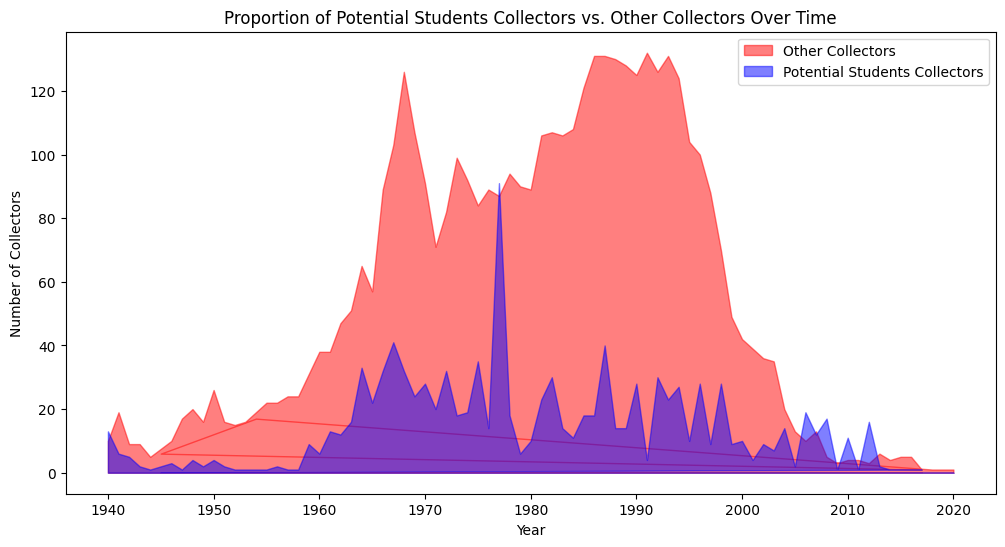

In [299]:
# Convert to pandas DataFrame
df_students = pd.DataFrame(list(accumulated_potential_students.items()), columns=['Year', 'Potential Students'])
df_collectors = pd.DataFrame(list(accumulated_no_students.items()), columns=['Year', 'Other Collectors'])

# Merge the DataFrames
df_stuvscoll = pd.merge(df_students, df_collectors, on='Year', how='outer').fillna(0)


# Calculate proportion of potential students collectors
df_stuvscoll['Proportion Students (%)'] = (df_stuvscoll['Potential Students'] / df_stuvscoll['Other Collectors']) * 100

# Plot the data
plt.figure(figsize=(12, 6))

# Plot stacked area plot
plt.fill_between(df_stuvscoll['Year'], 0, df_stuvscoll['Other Collectors'], color='red', alpha=0.5, label='Other Collectors')
plt.fill_between(df_stuvscoll['Year'], 0, df_stuvscoll['Potential Students'], color='blue', alpha=0.5, label='Potential Students Collectors')


# Add titles and labels
plt.title('Proportion of Potential Students Collectors vs. Other Collectors Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Collectors')
plt.legend()
plt.grid(False)

# Show plot
plt.show()

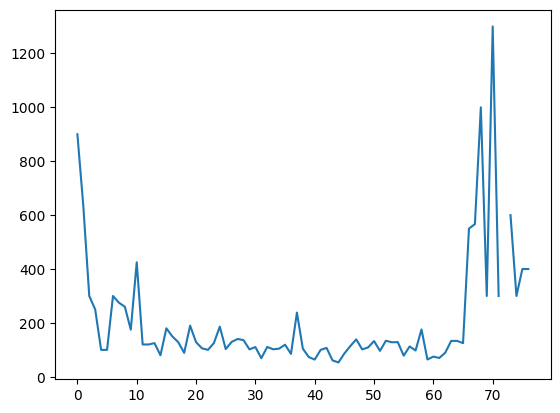

In [155]:
plt.plot(df_stuvscoll['Proportion Students (%)'])

In [300]:
from collections import defaultdict
import pandas as pd

# Initialize a dictionary to accumulate counts by year
accumulated_specimens = defaultdict(int)

# Accumulate counts by year
for name in filtered_names:
    record_numbers, years = recorded_by_dict[name]
    
    try:
        start_year = pd.to_datetime(years[0]).year if pd.notna(years[0]) else None
        end_year = pd.to_datetime(years[1]).year if pd.notna(years[1]) else None
        
        if start_year is None or end_year is None:
            continue  # Skip this name if years are NaN or not usable
        
        for year in range(start_year, end_year + 1):
            accumulated_specimens[year] += len(record_numbers)  # Add count of record numbers
    
    except (TypeError, ValueError):
        continue  # Skip this name if there's an error in year extraction

# Convert defaultdict to regular dictionary and sort by year
accumulated_specimens = dict(sorted(accumulated_specimens.items()))

# Display the accumulated counts by year
print(accumulated_specimens)


{1923: 2, 1927: 1, 1930: 4, 1932: 3, 1933: 2, 1934: 10, 1935: 17, 1936: 13, 1937: 13, 1938: 7, 1939: 25, 1940: 39, 1941: 12, 1942: 8, 1943: 3, 1944: 1, 1946: 4, 1947: 2, 1948: 5, 1949: 5, 1950: 4, 1951: 4, 1952: 3, 1953: 1, 1955: 2, 1956: 2, 1957: 3, 1958: 1, 1959: 20, 1960: 33, 1961: 69, 1962: 57, 1963: 51, 1964: 62, 1965: 40, 1966: 128, 1967: 390, 1968: 295, 1969: 412, 1970: 529, 1971: 323, 1972: 412, 1973: 322, 1974: 913, 1975: 1025, 1976: 968, 1977: 885, 1978: 397, 1979: 258, 1980: 336, 1981: 684, 1982: 925, 1983: 485, 1984: 371, 1985: 535, 1986: 701, 1987: 978, 1988: 534, 1989: 402, 1990: 1055, 1991: 313, 1992: 862, 1993: 517, 1994: 919, 1995: 462, 1996: 861, 1997: 271, 1998: 763, 1999: 287, 2000: 564, 2001: 241, 2002: 560, 2003: 447, 2004: 769, 2005: 242, 2006: 565, 2007: 225, 2008: 634, 2009: 213, 2010: 239, 2011: 213, 2012: 294, 2013: 216, 2014: 213, 2015: 213, 2016: 213, 2017: 213}


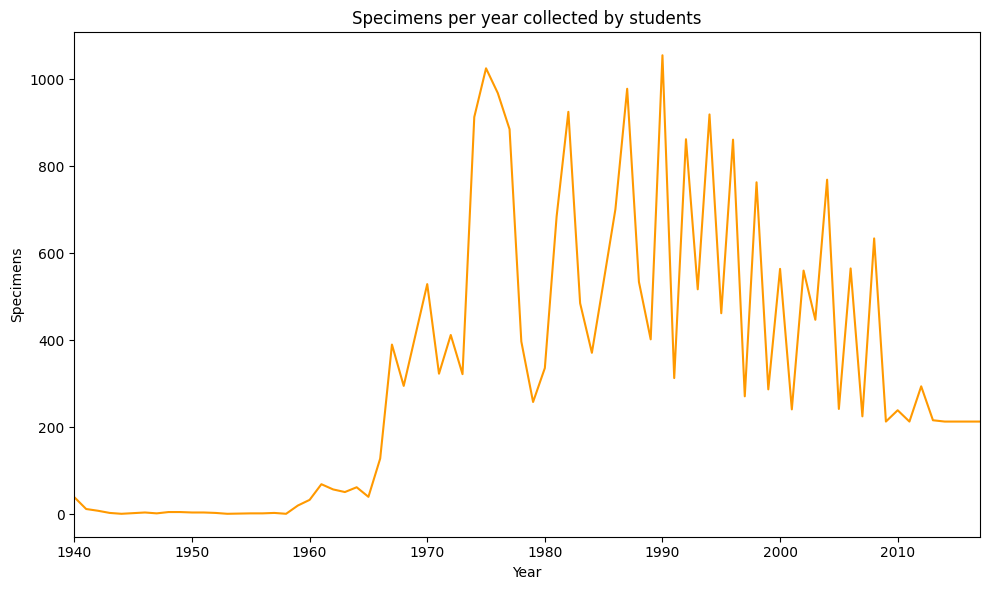

In [301]:
import matplotlib.pyplot as plt

# Assuming accumulated_counts is already calculated and sorted

# Extract years and counts from accumulated_counts
years = list(accumulated_specimens.keys())
counts = list(accumulated_specimens.values())

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(years, counts, marker='', linestyle='-', color='#FF9900', label='Accumulated Specimens')
plt.xlabel('Year')
plt.ylabel('Specimens')
plt.title('Specimens per year collected by students')

# Set x-axis limits (adjust these as needed)
min_year = 1940 #min(years)
max_year = max(years)
plt.xlim(min_year, max_year)

# Uncomment the following lines if you want to add grid and legend
# plt.grid(True)
# plt.legend()

plt.tight_layout()

# Display the plot
plt.show()


In [302]:
import pandas as pd

def get_names_in_year(data_dict, target_year):
    names_in_year = []
    for name, values in data_dict.items():
        years = values[1]  # Assuming values[1] contains the year range [start_year, end_year]
        start_year = pd.to_datetime(years[0]).year  # Extract year from Timestamp
        end_year = pd.to_datetime(years[1]).year    # Extract year from Timestamp
        if start_year <= target_year <= end_year:
            names_in_year.append(name)
    return names_in_year

# Example usage:
target_year = 1899
names_in_year = get_names_in_year(recorded_by_dict, target_year)

print(f"Names recorded in {target_year}:")
print(names_in_year)


Names recorded in 1899:
['C. K. Dodge', 'F. Kurtz', 'Ieg H. Eggert', 'Richard Brown']


In [303]:
recorded_by_dict["A. Glez."]

[['s.n.', 's.n.'],
 [Timestamp('1986-01-01 00:00:00'), Timestamp('1986-01-01 00:00:00')]]

In [80]:
import geopandas as gpd
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt
import us

# Load the GeoJSON file containing the US counties
geojson_file = 'counties.geojson'
counties_gdf = gpd.read_file(geojson_file)

# Function to get FIPS code from state name or abbreviation
def get_fips_code(state):
    if isinstance(state, str):
        state_obj = us.states.lookup(state)
        return state_obj.fips if state_obj else None
    return None

# Ensure the stateProvince column is treated as strings
df['stateProvince'] = df['stateProvince'].astype(str)

# Convert stateProvince to state FIPS code in the DataFrame
df['stateProvinceFIPS'] = df['stateProvince'].apply(get_fips_code)


In [123]:
import geopandas as gpd
import pandas as pd
import us

# Load the GeoJSON file containing the US counties
geojson_file = 'counties.geojson'
counties_gdf = gpd.read_file(geojson_file)

# Filter data for Texas only in the counties GeoDataFrame
texas_counties_gdf = counties_gdf[counties_gdf['STATEFP'] == us.states.TX.fips]


# Filter data for Texas only in your dataframe (assuming 'stateProvinceFIPS' corresponds correctly to Texas)
texas_df = df[df['stateProvince'] == 'Texas']

# # Convert 'county' column to lowercase
# texas_df['county'] = texas_df['county'].str.lower()


# Calculate row counts per county
county_counts = df['county'].value_counts().to_dict()


# Merge county counts with Texas counties GeoDataFrame
texas_counties_gdf['count'] = texas_counties_gdf['NAME'].map(county_counts).fillna(0)

/home/cmayalastra/.local/lib/python3.10/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [124]:
texas_counties_gdf

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID       NAME LSAD  \
4         48      421  01383996  0500000US48421  48421    Sherman   06   
17        48      493  01384032  0500000US48493  48493     Wilson   06   
18        48      115  01383843  0500000US48115  48115     Dawson   06   
47        48      069  01383820  0500000US48069  48069     Castro   06   
48        48      279  01383926  0500000US48279  48279       Lamb   06   
...      ...      ...       ...             ...    ...        ...  ...   
3163      48      063  01383817  0500000US48063  48063       Camp   06   
3167      48      227  01383899  0500000US48227  48227     Howard   06   
3190      48      109  01383840  0500000US48109  48109  Culberson   06   
3199      48      469  01384020  0500000US48469  48469   Victoria   06   
3201      48      351  01383961  0500000US48351  48351     Newton   06   

           ALAND    AWATER                                           geometry  \
4     2390651189    428754  POLYGON ((-102.16246 36.50033, -102.03234 36.5...   
17    2081662847  12111367  POLYGON ((-98.40734 29.11443, -98.13417 29.441...   
18    2331781556   4720730  POLYGON ((-102.20852 32.95896, -102.07621 32.9...   
47    2316573415  12584396  POLYGON ((-102.52518 34.74693, -102.16884 34.7...   
48    2631897577   3973764  POLYGON ((-102.61515 34.31289, -102.52563 34.3...   
...          ...       ...                                                ...   
3163   507184763  19186958  POLYGON ((-95.15221 33.01345, -95.12613 33.034...   
3167  2333039139   8841781  POLYGON ((-101.68874 32.52522, -101.17457 32.5...   
3190  9873439554    556134  POLYGON ((-104.91836 32.00047, -104.84774 32.0...   
3199  2284644914  17425945  POLYGON ((-97.30592 28.86404, -96.97638 29.104...   
3201  2418212543  15672146  POLYGON ((-93.91113 31.15807, -93.61617 31.175...   

      count  
4       1.0  
17     78.0  
18      2.0  
47     37.0  
48    106.0  
...     ...  
3163    4.0  
3167   32.0  
3190  252.0  
3199   77.0  
3201  309.0  

[254 rows x 11 columns]

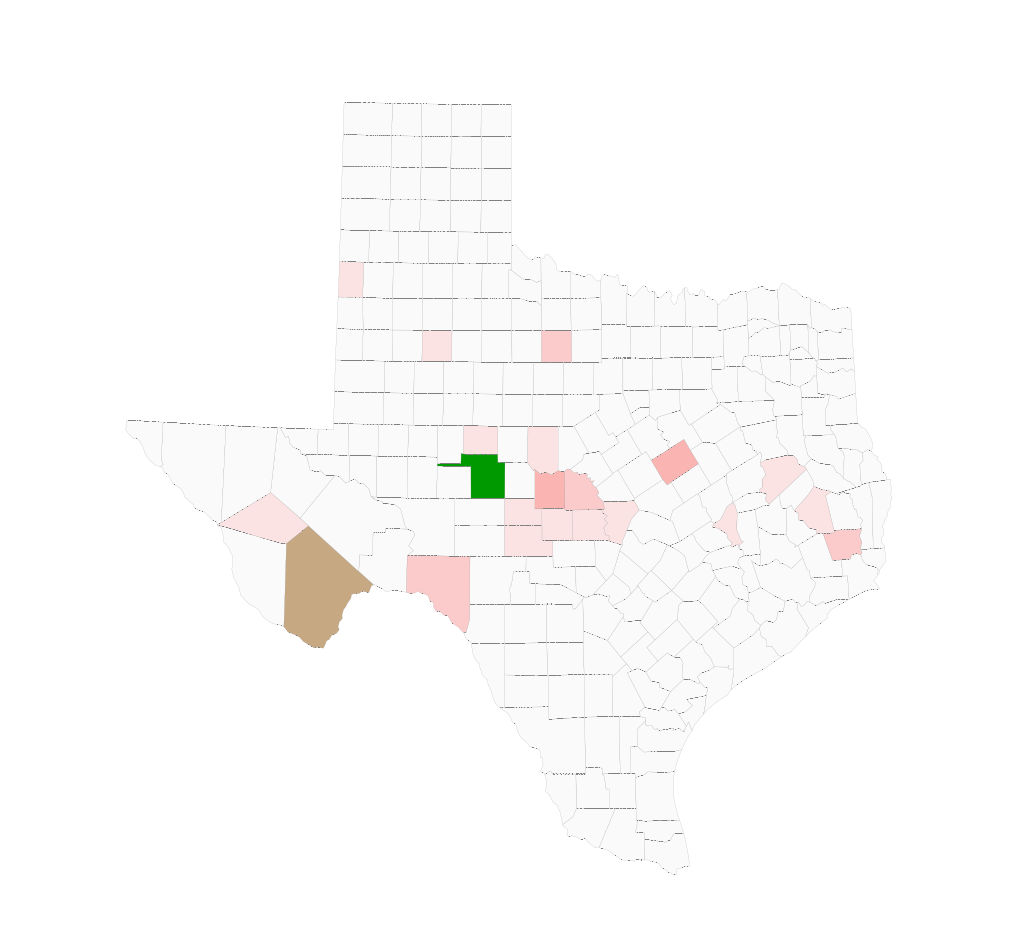

In [143]:
from matplotlib.colors import LinearSegmentedColormap


# Define a custom colormap with specific colors
colors = ['#FAFAFA', '#FA8D89', '#93C47D', '#009900']  # Light gray, light green, dark green
cmap = LinearSegmentedColormap.from_list('custom_cmap', colors, N=15)

# Plot the choropleth map with custom colormap
gplt.choropleth(
    texas_counties_gdf,
    projection=gcrs.AlbersEqualArea(),
    hue="count",
    cmap=cmap,
    linewidth=0.1,
    edgecolor='gray',
    legend=False,
    # legend_kwargs={'orientation': 'vertical'},
    figsize=(20, 12)
)

# plt.title('Choropleth Map of County Counts in Texas')
plt.show()

In [329]:
import pandas as pd

# Get the 10 most frequent 'recordedBy'
most_frequent_recordedBy = df['recordedBy'].value_counts().head(10)

# Get the 10 most frequent 'scientificName'
most_frequent_scientificName = df['scientificName'].value_counts().head(20)

# Get the 10 most frequent 'genus'
most_frequent_genus = df['genus'].value_counts().head(10)

print("10 Most Frequent 'recordedBy':")
print(most_frequent_recordedBy)

print("\n10 Most Frequent 'scientificName':")
print(most_frequent_scientificName)

print("\n10 Most Frequent 'genus':")
print(most_frequent_genus)


10 Most Frequent 'recordedBy':
recordedBy
Stanely D. Jones         7468
Stanley D. Jones         4310
Chester M. Rowell Jr.    2119
Bonnie B. Amos           2007
Robert Eckhardt          1619
Robert Kral              1457
R. D. Worthington        1357
Steven G. Whisenant      1176
Charles T. Bryson        1107
Joe Cornelius            1105
Name: count, dtype: int64

10 Most Frequent 'scientificName':
scientificName
Carex muehlenbergii          258
Carex leavenworthii          207
Carex blanda                 196
Glandularia bipinnatifida    191
Callirhoe involucrata        187
Aristida purpurea            182
Asclepias asperula           168
Castilleja purpurea          156
Carex cephalophora           151
Xanthisma spinulosum         151
Lupinus texensis             151
Oenothera speciosa           147
Carex austrina               147
Allium drummondii            144
Solanum elaeagnifolium       140
Gaillardia pulchella         140
Oenothera hartwegii          139
Lithospermum incisum

In [328]:
most_frequent_scientificName

scientificName
Carex muehlenbergii          258
Carex leavenworthii          207
Carex blanda                 196
Glandularia bipinnatifida    191
Callirhoe involucrata        187
Aristida purpurea            182
Asclepias asperula           168
Castilleja purpurea          156
Carex cephalophora           151
Xanthisma spinulosum         151
Name: count, dtype: int64

In [327]:
import pandas as pd

# Create a copy of the year column
df_copy = df[['year']].copy()

# Extract the year from the timestamp
df_copy['year'] = df_copy['year'].dt.year

# Create a new column for the century
df_copy['century'] = (df_copy['year'] // 100) + 1

# Group by the century and count the number of records
records_per_century = df_copy.groupby('century').size()

print(records_per_century)


century
19.0       22
20.0    51533
21.0     5416
22.0        1
dtype: int64


In [21]:
import pandas as pd

df = pd.read_csv('Spring2024_students_collections_cens.csv', low_memory=False)

In [22]:
df.shape

(542, 22)

In [23]:
df.columns

Index(['collectedBy', 'collectorNumber', 'collectionDate', 'family', 'genus',
       'specificEpithet', 'infraspecificEpithet', 'habitatDescription',
       'associatedTaxa', 'reproductiveCondition', 'cultivationStatus', 'sex',
       'morphologicalDescription', 'country', 'stateProvince', 'county',
       'municipality', 'locality', 'decimalLatitude', 'decimalLongitude',
       'elevationNumber', 'Unnamed: 21'],
      dtype='object')

In [24]:
import pandas as pd
import re

def convert_to_decimal(coord):
    match = re.match(r'(\d+\.?\d*)[°\s]*([NS]),?\s*(\d+\.?\d*)[°\s]*([EW])', coord)
    if match:
        lat, lat_dir, lon, lon_dir = match.groups()
        lat = float(lat) if lat_dir == 'N' else -float(lat)
        lon = float(lon) if lon_dir == 'E' else -float(lon)
        return lat, lon
    return None, None

def clean_coordinate(coord, direction):
    if isinstance(coord, str):
        coord = coord.strip()
        if any(d in coord for d in 'NSEW'):
            return convert_to_decimal(coord)[0 if direction == 'lat' else 1]
        try:
            return float(coord)
        except ValueError:
            return None
    return coord

df['decimalLatitude'] = df['decimalLatitude'].apply(lambda x: clean_coordinate(x, 'lat'))
df['decimalLongitude'] = df['decimalLongitude'].apply(lambda x: clean_coordinate(x, 'lon'))

# Ensure the conversion for remaining nulls
for i, row in df.iterrows():
    if pd.isnull(row['decimalLatitude']) or pd.isnull(row['decimalLongitude']):
        lat, lon = convert_to_decimal(f"{row['decimalLatitude']} {row['decimalLongitude']}")
        if lat is not None and lon is not None:
            df.at[i, 'decimalLatitude'] = lat
            df.at[i, 'decimalLongitude'] = lon

df


collectedBy  collectorNumber       collectionDate       family  \
0            NaN              1.0  2024-03-21 00:00:00  Verbenaceae   
1            NaN              2.0  2024-03-21 00:00:00    Malvaceae   
2            NaN              3.0  2024-03-21 00:00:00   Solanaceae   
3            NaN              4.0  2024-03-21 00:00:00     Oleaceae   
4            NaN              5.0  2024-03-21 00:00:00   Asteraceae   
..           ...              ...                  ...          ...   
537          NaN             27.0  2024-04-18 00:00:00   Asteraceae   
538          NaN             28.0  2024-04-26 00:00:00      Poaceae   
539          NaN             29.0  2024-04-26 00:00:00      Poaceae   
540          NaN             30.0  2024-03-23 00:00:00    Lamiaceae   
541          NaN             31.0  2024-04-11 00:00:00  Verbenaceae   

             genus specificEpithet infraspecificEpithet  \
0      Glandularia          pumila                  NaN   
1      Sphaeralcea       hastulata                  NaN   
2    Chamaesaracha       conioides                  NaN   
3         Menodora    heterophylla                  NaN   
4         Erigeron        modestus                  NaN   
..             ...             ...                  ...   
537  Aphanostephus             NaN                  NaN   
538        Festuca             NaN                  NaN   
539        Cynodon             NaN                  NaN   
540         Lamium             NaN                  NaN   
541        Verbena             NaN                  NaN   

                                    habitatDescription  \
0    Mesquite and prickly pear prairie scrub in hik...   
1    Mesquite and prickly pear prairie scrub in hik...   
2    Mesquite and prickly pear prairie scrub in hik...   
3    Mesquite and prickly pear prairie scrub in hik...   
4    Mesquite and prickly pear prairie scrub in hik...   
..                                                 ...   
537  single individual in full sun about 100m away ...   
538  growing in margins between landscaped areas on...   
539  occurring as a turf grass at Angelo State Univ...   
540  growing in fenceline, sheltered within thick g...   
541  occuring in full sun area that also serves sea...   

                                        associatedTaxa reproductiveCondition  \
0    Carya illinoensis, Marrubium vulgare, Solanum ...                flower   
1    Carya illinoensis, Marrubium vulgare, Solanum ...                flower   
2    Carya illinoensis, Marrubium vulgare, Solanum ...                flower   
3    Carya illinoensis, Marrubium vulgare, Solanum ...                flower   
4    Carya illinoensis, Marrubium vulgare, Solanum ...                flower   
..                                                 ...                   ...   
537                              Aphanostephus pilosus             flowering   
538                                     Festuca lucida   seed heads apparent   
539                                    Cynodon barberi   seed heads apparent   
540                                       Lamium album             flowering   
541                               Verbena californicus             flowering   

     ...                           morphologicalDescription        country  \
0    ...                                                NaN            USA   
1    ...                                                NaN            USA   
2    ...        outer corolla white, inner part pale yellow            USA   
3    ...                                                NaN            USA   
4    ...                                                NaN            USA   
..   ...                                                ...            ...   
537  ...          daisy-like herb with single inflorescence  United States   
538  ...                              an herbaceous monocot  United States   
539  ...                              an herbaceous monocot  United States   
540  

In [25]:
import folium
from folium.plugins import HeatMap
from IPython.display import display
import numpy as np

# Drop rows with NaN values in 'decimalLatitude' or 'decimalLongitude'
df_clean = df.dropna(subset=['decimalLatitude', 'decimalLongitude'])

# Calculate map center
map_center = [df_clean['decimalLatitude'].mean(), df_clean['decimalLongitude'].mean()]

# Create map
m = folium.Map(location=map_center, zoom_start=5)

# Prepare data for heatmap
heat_data = df_clean[['decimalLatitude', 'decimalLongitude']].values.tolist()

# Add heatmap layer
heatmap  = HeatMap(heat_data, radius=5, blur=5).add_to(m)


# Display map in notebook
display(m)



#save
m.save("heatmap.html")